### DESCRIPTIVE ANALYTICS 

In [1]:
import pandas as pd
sales = pd.read_csv("C:\\Users\\saibh\\OneDrive\\Documents\\EXCELR\\Basic stats - 1\\sales_data_with_discounts.csv")
sales

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,15-04-2021,Thursday,L06,C,2,Lifestyle,Jeera,M-Casuals,1300,2600,15.475687,402.367873,2197.632127
446,15-04-2021,Thursday,L07,C,6,Lifestyle,Viva,W-Western,2600,15600,17.057027,2660.896242,12939.103758
447,15-04-2021,Thursday,L08,C,2,Lifestyle,Viva,W-Lounge,1600,3200,18.965550,606.897606,2593.102394
448,15-04-2021,Thursday,L09,C,3,Lifestyle,Jeera,M-Formals,1900,5700,16.793014,957.201826,4742.798174


In [2]:
sales.select_dtypes(include=['number'])

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [3]:
sales.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


### DATA VISUALIZATION

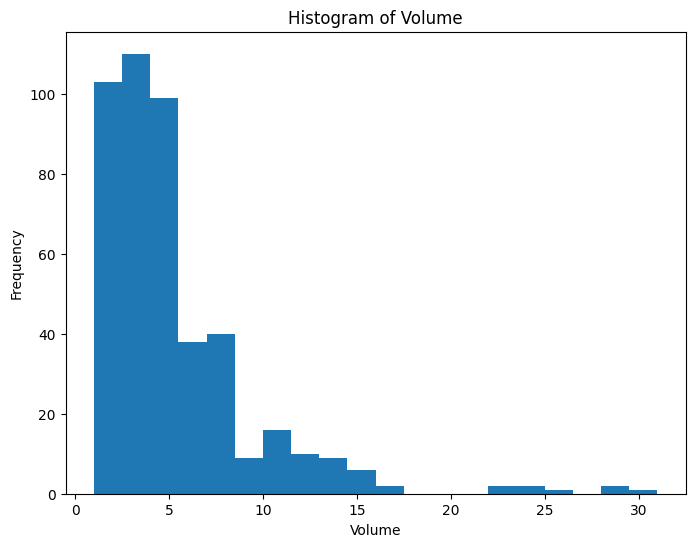

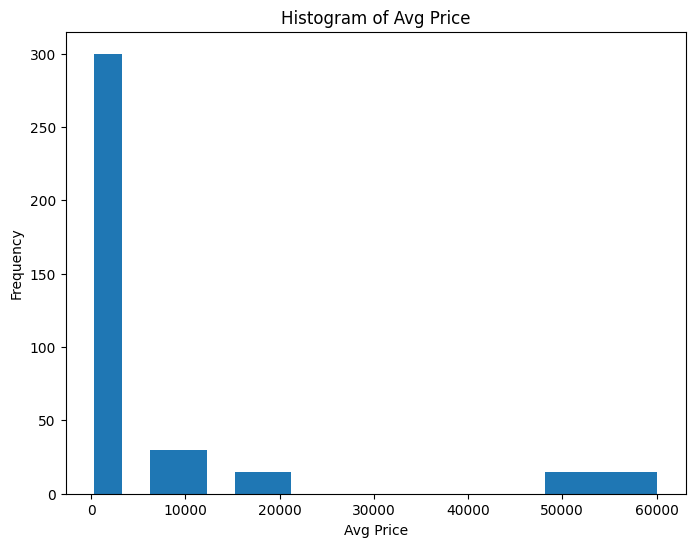

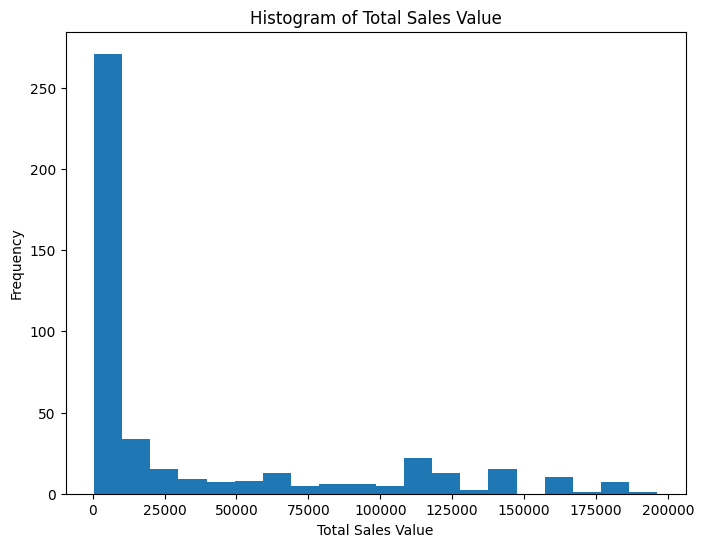

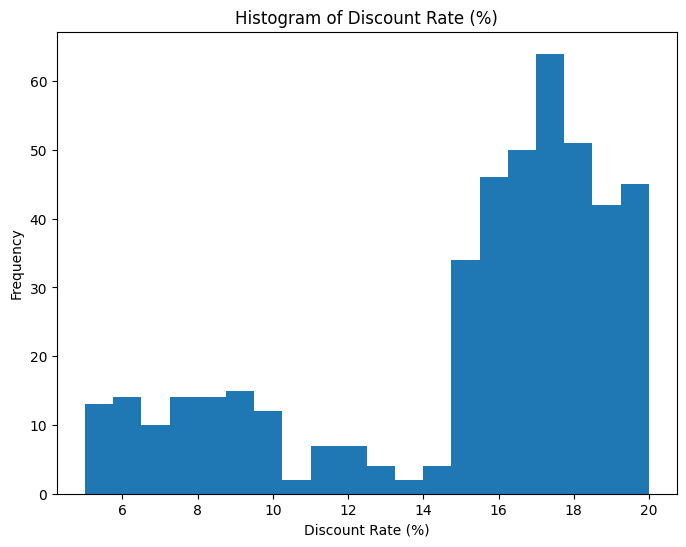

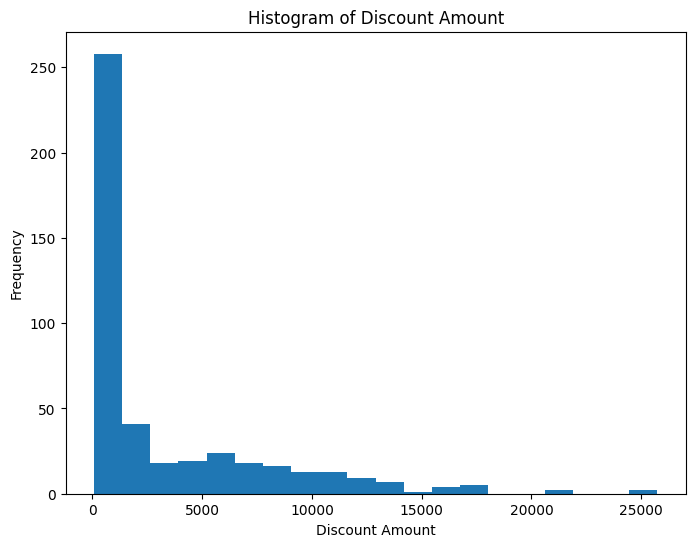

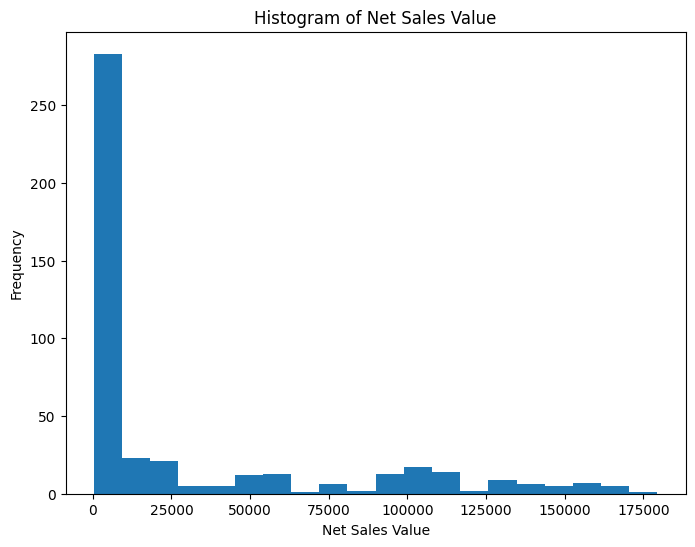

In [4]:
import matplotlib.pyplot as plt
for col in sales.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    plt.hist(sales[col], bins=20)  # Adjust number of bins as needed
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [5]:
skewness = sales[col].skew()
print(f"Skewness of {col}: {skewness}")

Skewness of Net Sales Value: 1.5408217575344376


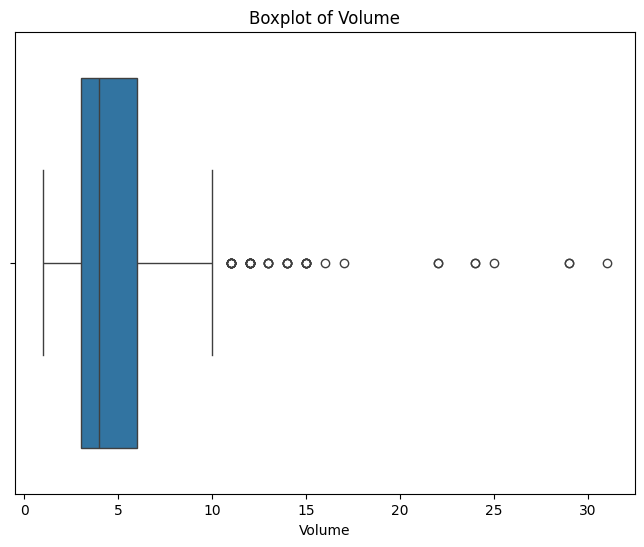

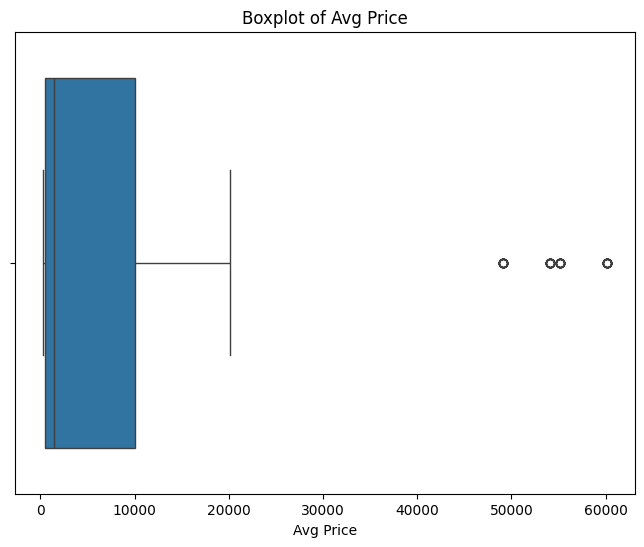

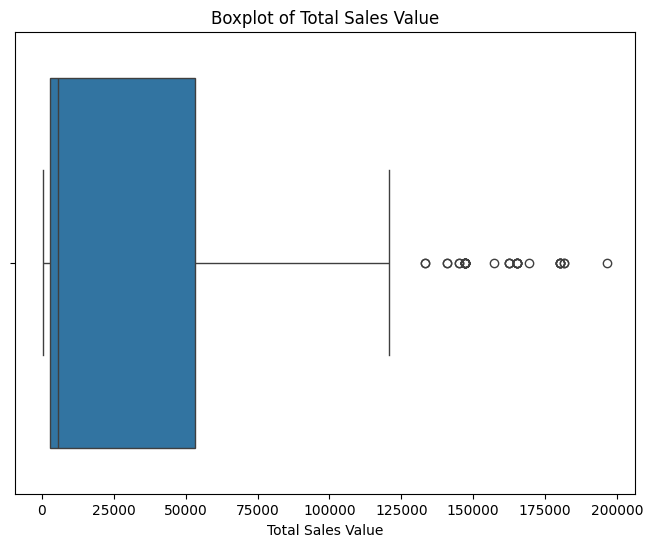

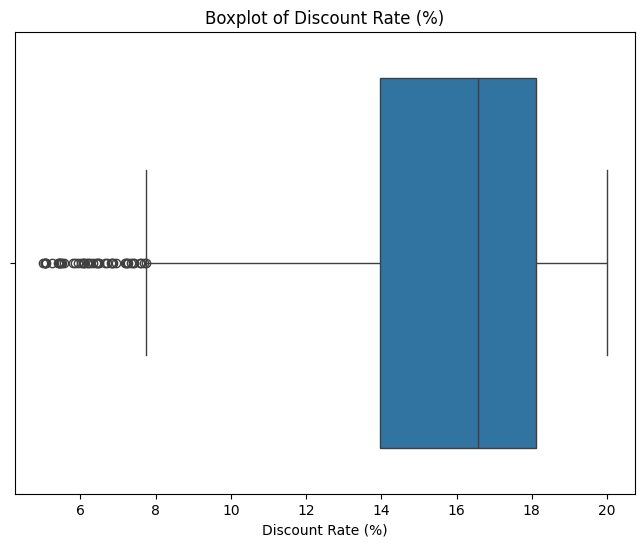

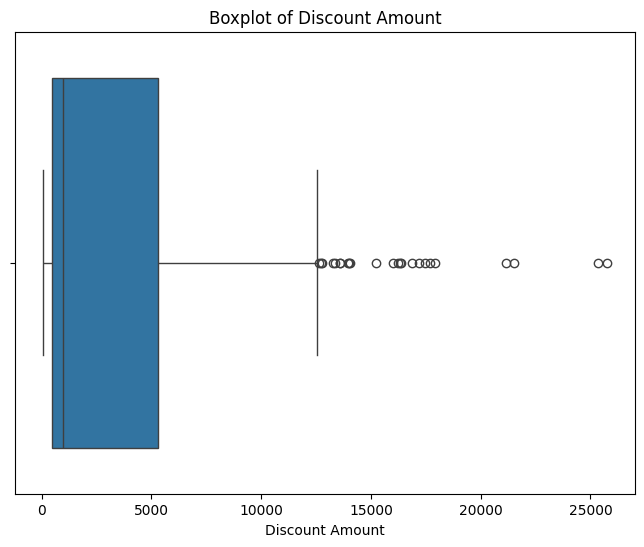

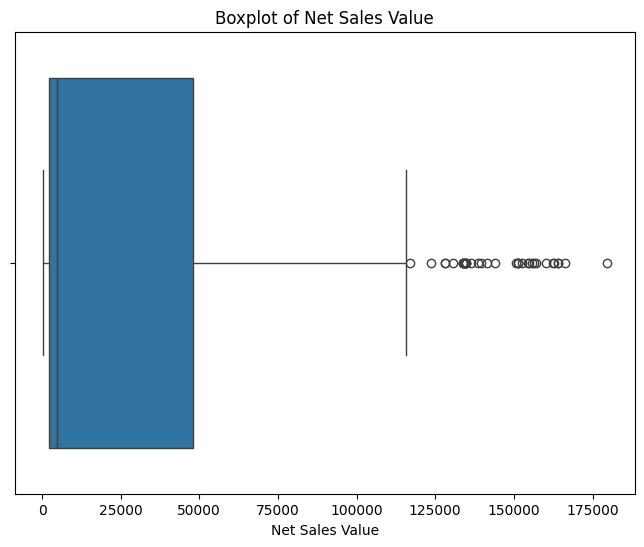

In [6]:
import seaborn as sns
for col in sales.select_dtypes(include=['number']):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=sales[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

In [7]:
if abs(skewness) > 0.5:
      print(f"The distribution of {col} is significantly skewed. This may indicate the presence of outliers or non-normality. Further investigation is needed.")
else:
      print(f"The distribution of {col} appears relatively symmetric.")

if sales[col].isnull().sum() > 0:
        print(f"There are missing values in {col}.")

The distribution of Net Sales Value is significantly skewed. This may indicate the presence of outliers or non-normality. Further investigation is needed.


In [8]:
Q1 = sales[col].quantile(0.25)
Q3 = sales[col].quantile(0.75)
IQR = Q3 - Q1  # Replace QR with IQR for consistency
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"IQR for {col}: {IQR}")


IQR for Net Sales Value: 45645.70420627015


In [9]:
# Identify outliers
outliers = sales[(sales[col] < lower_bound) | (sales[col] > upper_bound)]

# Check if outliers exist
if not outliers.empty:
    print(f"Potential outliers detected in {col}:")
    print(outliers[col])
else:
    print(f"No outliers detected in {col}.")


Potential outliers detected in Net Sales Value:
0      160346.501180
6      133705.960281
9      162399.016267
36     139563.638215
38     151348.339806
39     163915.971000
66     179507.479049
96     134677.496342
126    134731.954625
127    152667.358354
157    151182.489533
180    128021.668141
186    134546.434042
187    150648.927866
188    151300.061501
189    162603.186379
210    144071.775796
216    133691.761681
240    155761.977806
243    130557.833327
246    136485.419091
278    154937.485475
300    123703.324633
306    134934.946692
308    154541.087365
309    163967.080070
338    156895.968772
339    166263.161348
363    127965.990988
366    134024.219259
390    116881.405280
396    133917.772667
420    141315.267719
426    138449.922039
428    156330.969890
Name: Net Sales Value, dtype: float64


In [10]:
# Bar Chart Analysis for Categorical Column:
categorical_col = sales.select_dtypes(include=['object']).columns
categorical_col

Index(['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model'], dtype='object')

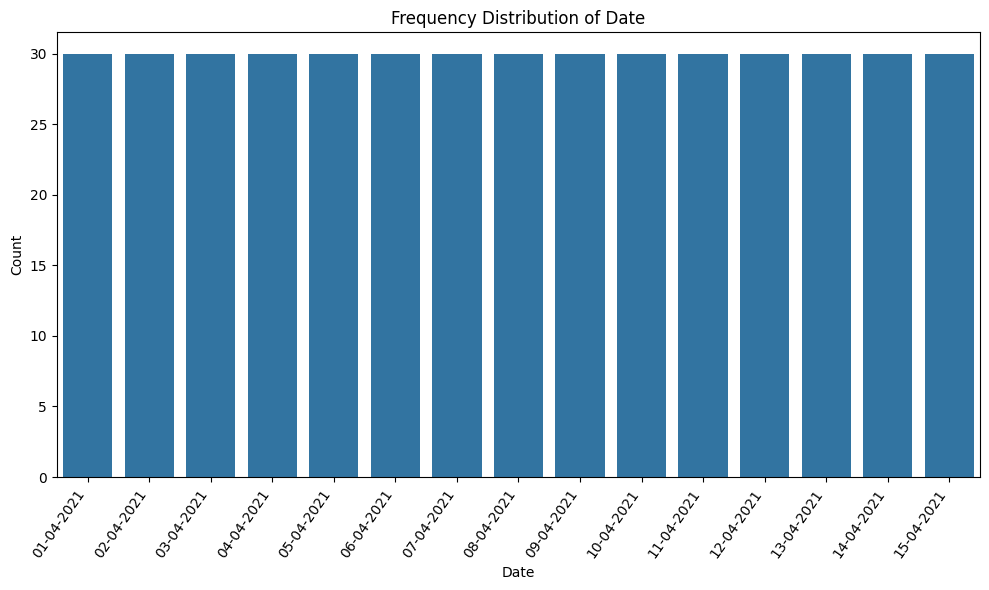

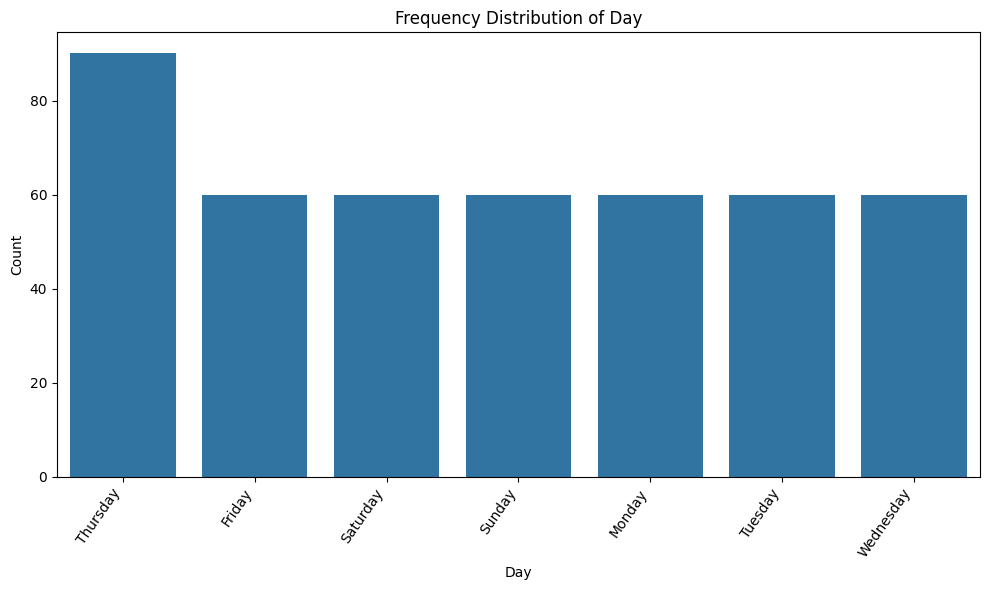

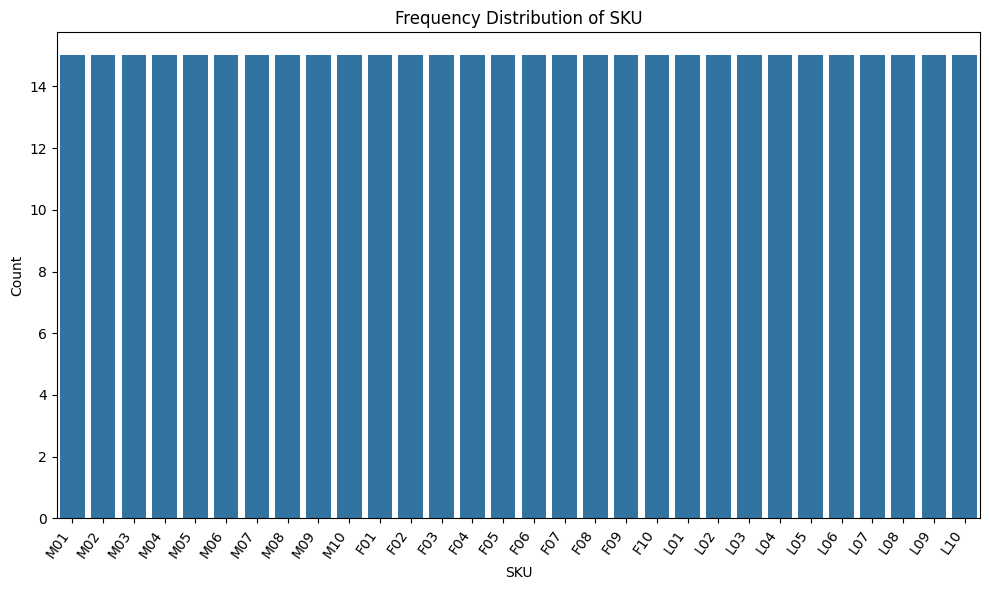

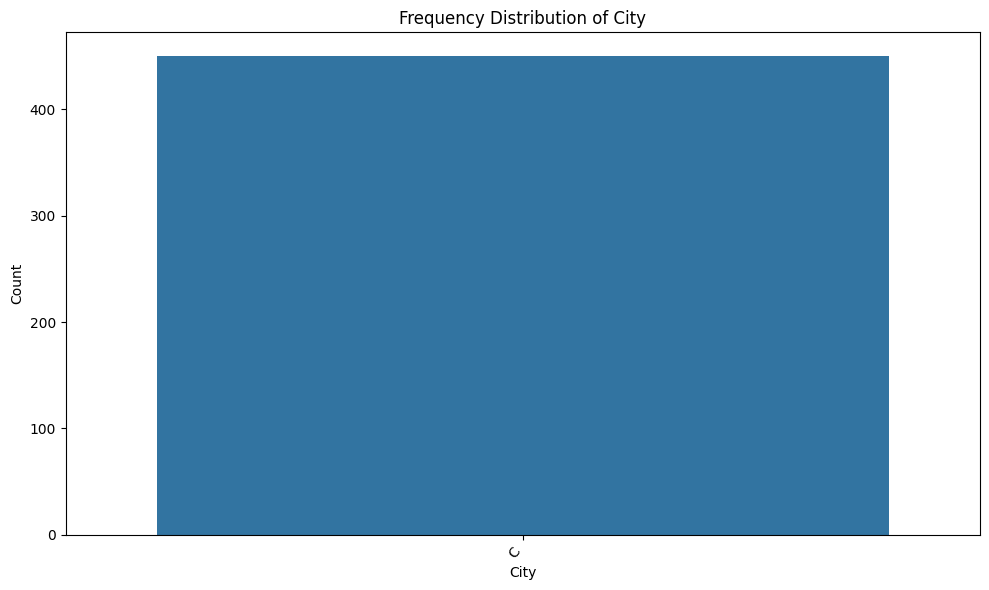

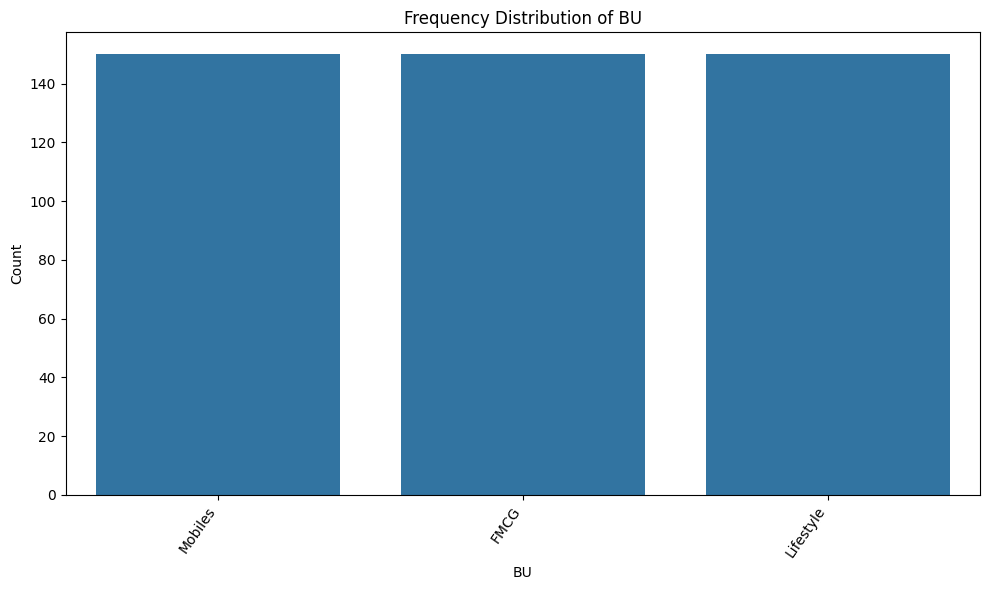

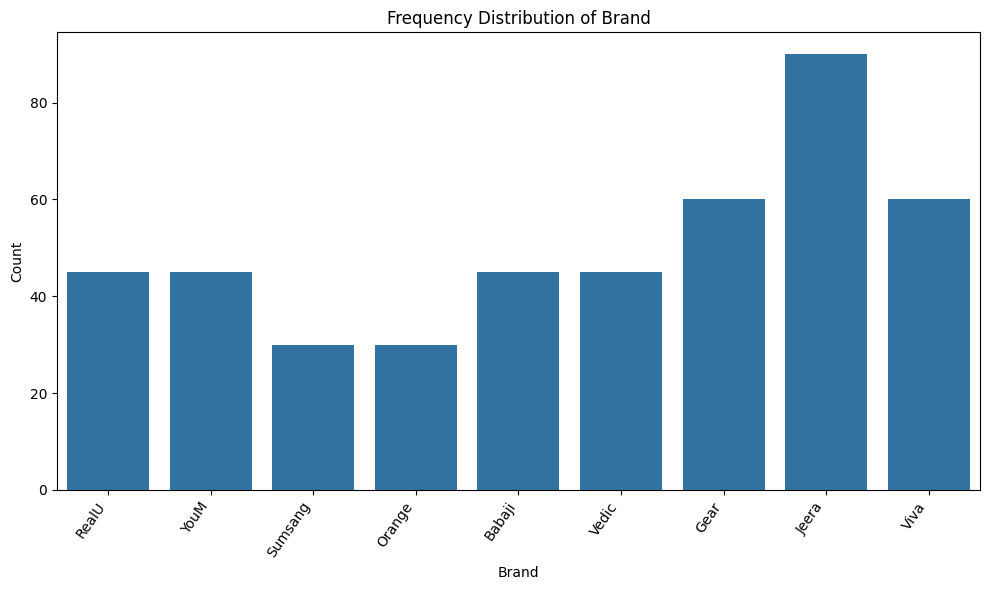

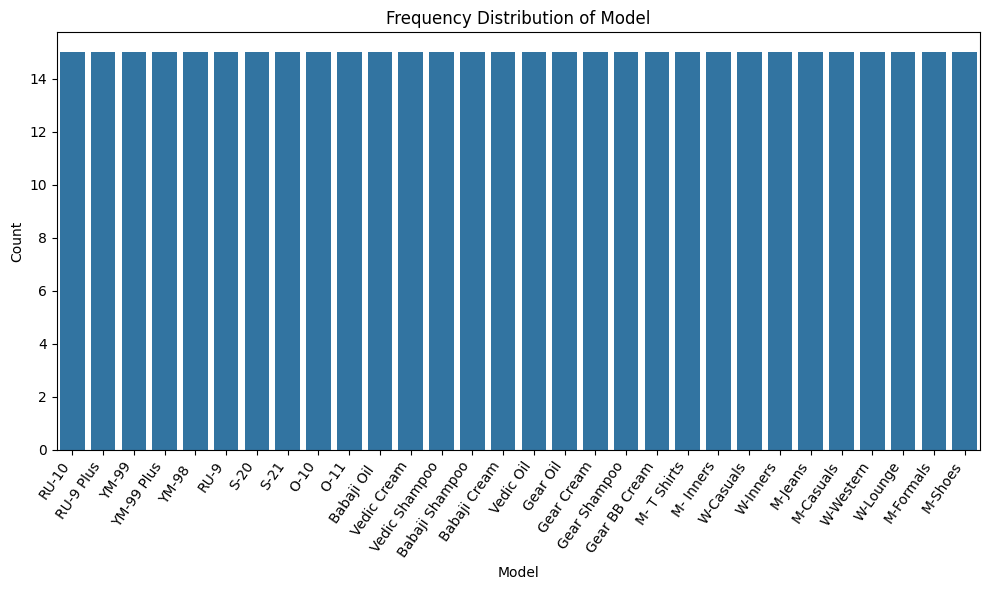

In [11]:
for col in categorical_col:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=sales)
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=55, ha='right') 
    plt.tight_layout()  
    plt.show()

In [12]:
value_counts = sales[col].value_counts()
print(f"Value counts for {col}:\n{value_counts}\n")

Value counts for Model:
Model
RU-10             15
RU-9 Plus         15
M-Formals         15
W-Lounge          15
W-Western         15
M-Casuals         15
M-Jeans           15
W-Inners          15
W-Casuals         15
M- Inners         15
M- T Shirts       15
Gear BB Cream     15
Gear Shampoo      15
Gear Cream        15
Gear Oil          15
Vedic Oil         15
Babaji Cream      15
Babaji Shampoo    15
Vedic Shampoo     15
Vedic Cream       15
Babaji Oil        15
O-11              15
O-10              15
S-21              15
S-20              15
RU-9              15
YM-98             15
YM-99 Plus        15
YM-99             15
M-Shoes           15
Name: count, dtype: int64



### Standardization of Numerical Variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = sales.select_dtypes(include=['number']).columns
# Fit and transform the numerical columns
sales[numerical_cols] = scaler.fit_transform(sales[numerical_cols])
print(sales.head())

         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  0.466667  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  0.300000  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.200000  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.166667  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C  0.066667  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.197459           0.923980           0.443589         0.821397   
1   0.164019           0.513265           0.437294         0.452179   
2   0.264337           0.572959           0.296909         0.412513   
3   0.331216           0.613265           0.128636         0.323150   
4   0.130580           0.121939           0.866747         0.167665   

   Net Sales Value  
0         0.893063  
1         0.496689  
2         0.567668  
3         0.624560  
4         0.10938

In [ ]:
for col in numerical_cols:
    # Calculate mean and standard deviation
    mu = sales[col].mean()
    sigma = sales[col].std()
    # Apply "z-score normalization"
    sales[col + '_standardized'] = (sales[col] - mu) / sigma
print(sales.head())

         Date       Day  SKU City    Volume       BU  Brand       Model  \
0  01-04-2021  Thursday  M01    C  0.466667  Mobiles  RealU       RU-10   
1  01-04-2021  Thursday  M02    C  0.300000  Mobiles  RealU   RU-9 Plus   
2  01-04-2021  Thursday  M03    C  0.200000  Mobiles   YouM       YM-99   
3  01-04-2021  Thursday  M04    C  0.166667  Mobiles   YouM  YM-99 Plus   
4  01-04-2021  Thursday  M05    C  0.066667  Mobiles   YouM      YM-98    

   Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0   0.197459           0.923980           0.443589         0.821397   
1   0.164019           0.513265           0.437294         0.452179   
2   0.264337           0.572959           0.296909         0.412513   
3   0.331216           0.613265           0.128636         0.323150   
4   0.130580           0.121939           0.866747         0.167665   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0         0.893063             2.347417                

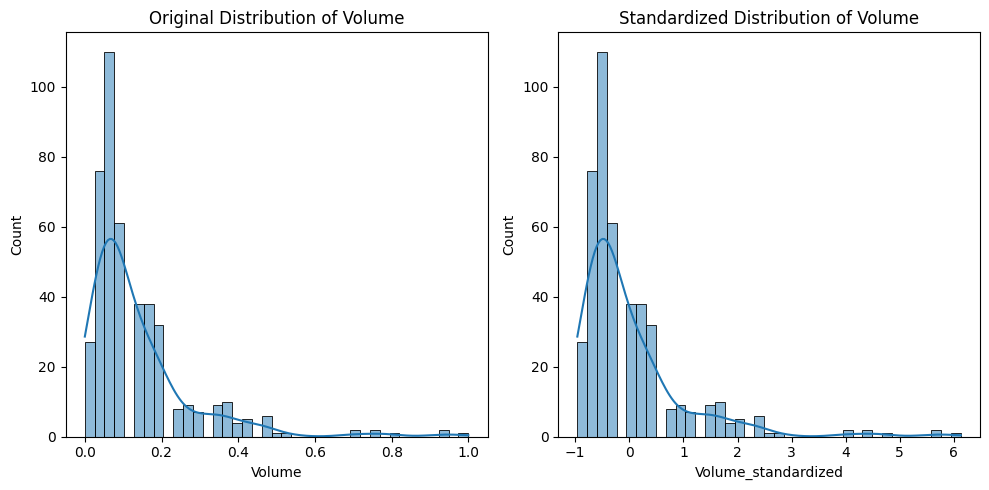

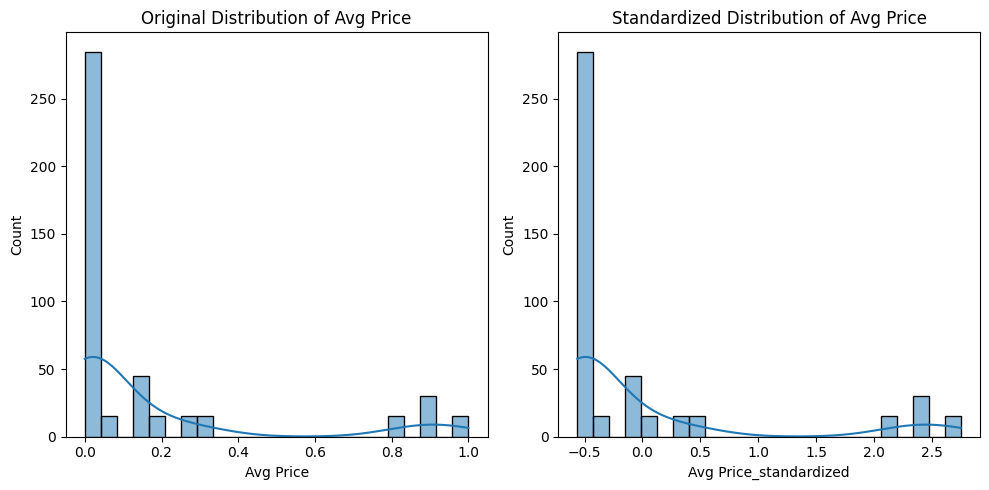

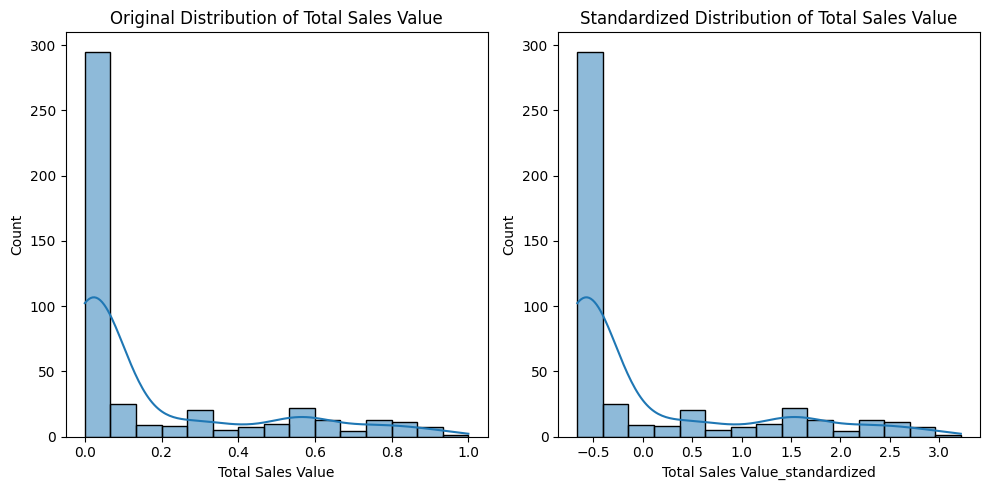

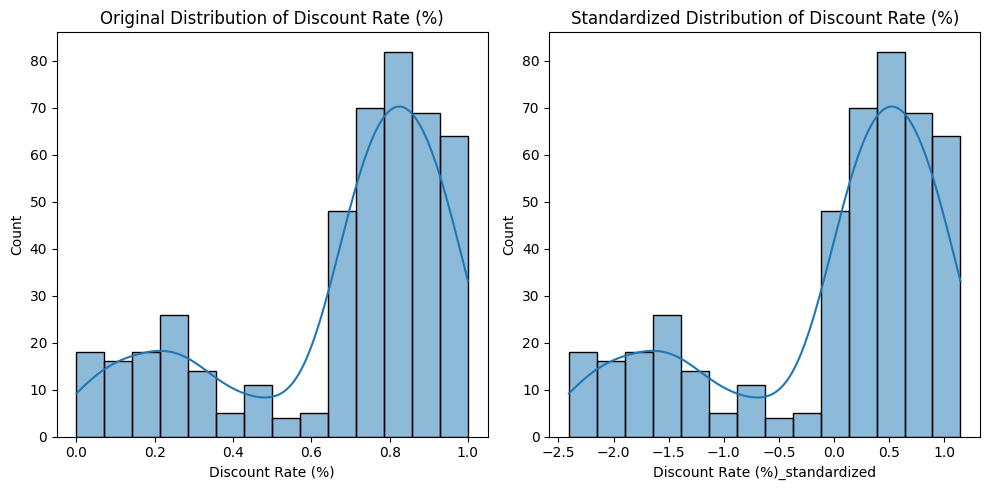

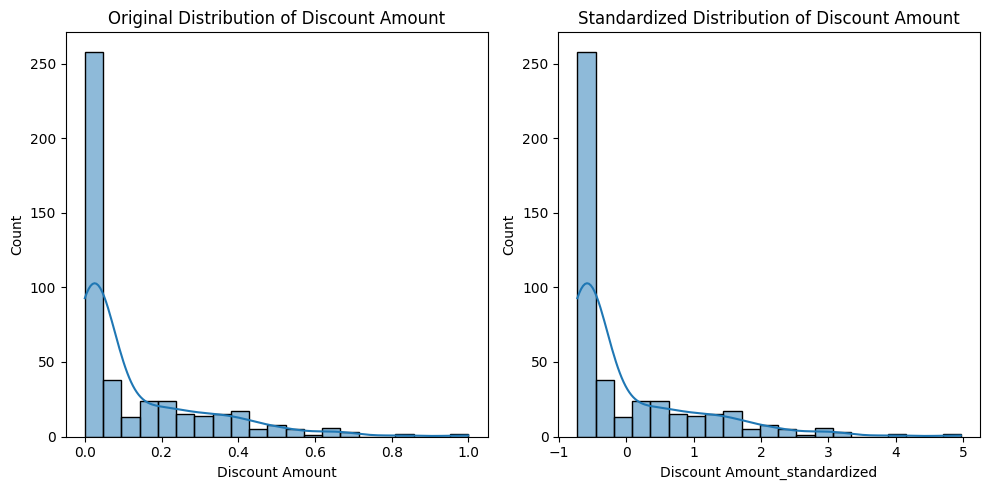

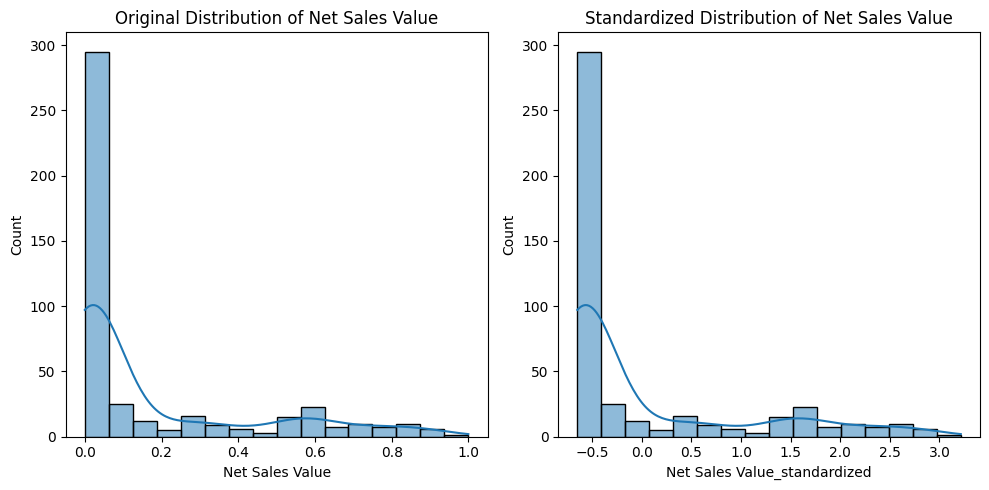

In [ ]:
# Iterating through the numerical columns and create distribution plots
for col in numerical_cols:
  # Before Standardization
  plt.figure(figsize=(10, 5))
  plt.subplot(1, 2, 1)
  sns.histplot(sales[col], kde=True)
  plt.title(f'Original Distribution of {col}')

  # After Standardization
  plt.subplot(1, 2, 2)
  sns.histplot(sales[col + '_standardized'], kde=True)
  plt.title(f'Standardized Distribution of {col}')

  plt.tight_layout()
  plt.show()

### Conversion of Categorical Data into Dummy Variables

In [19]:
columns_to_encode = ['Date', 'Day', 'SKU', 'City', 'BU', 'Brand', 'Model']
available_columns = [col for col in columns_to_encode if col in sales.columns]

# Apply one-hot encoding to available columns
sales = pd.get_dummies(sales, columns=available_columns)
print(sales.head())


     Volume  Avg Price  Total Sales Value  Discount Rate (%)  Discount Amount  \
0  0.466667   0.197459           0.923980           0.443589         0.821397   
1  0.300000   0.164019           0.513265           0.437294         0.452179   
2  0.200000   0.264337           0.572959           0.296909         0.412513   
3  0.166667   0.331216           0.613265           0.128636         0.323150   
4  0.066667   0.130580           0.121939           0.866747         0.167665   

   Net Sales Value  Volume_standardized  Avg Price_standardized  \
0         0.893063             2.347417                0.091072   
1         0.496689             1.165831               -0.019548   
2         0.567668             0.456880                0.312312   
3         0.624560             0.220563                0.533552   
4         0.109387            -0.488389               -0.130168   

   Total Sales Value_standardized  Discount Rate (%)_standardized  ...  \
0                        2.922469   